<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/interpolation_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function approximations

After this assignment, students are able to

*  Know some concepts: function spaces, basis funcitions, L2 norm.
*  Distinguish between the interpolation and L2-projection
*  Bring the methods into practice

# Basis functions
Let $V$ be a function space equiped with the L2 inner product
$$(f,g)=\int_{\Omega} f g\, dx$$ 
which generates the norm

$$||f||_{L2}=\sqrt{(f,f)}=\Biggl(\int_{\Omega} f^2\, dx\Biggl)^{1/2}$$ 

and $S$ be a sub-space of $V$ spanned by a set of basis functions $\{\varphi_i\}_{i=0..N-1}$
$$S=\text{span}\{\varphi_0, \varphi_1, ..., \varphi_{N-1}\}$$
Any function $u\in S$ can be written as a linear combination of the basis functions
$$u=\sum_{j=0}^{N-1}c_j\varphi_j$$


For example, a linear function space $S=\text{span}\{1, x\}$ and any function $u\in S$ has the form $u=c_0+c_1x$. Here $\varphi_0=1, \varphi_1=x$.


# Interpolation

Give a function $𝑓(x)\in𝑉$, find an approximation $\textit{If}\,(x)\in𝑆\subset𝑉$ such that $\textit{If}\,(x_i)=𝑓(𝑥_i)$ at $𝑁$ selected points $𝑥_𝑖$. 

Assume $𝑆=\text{span}\{𝜑_0, 𝜑_1,…, 𝜑_{N-1}\}$, then $$\textit{If}\,(x)=\sum_{j=0}^{N-1}c_j\varphi_j(x)$$
The contrainst $\textit{If}(x_j)=𝑓(𝑥_𝑗)$ implies that

$$\sum_{j=0}^{N-1}c_j\varphi_j (x_i)=f(x_i)$$


Matrix form $$\bf A\, c = b$$
where $A_{ij}=\varphi_j (x_i), \quad b_i=f(x_i)$

We need to solve this linear system to obtain the coefficients $c_i$.



**For example**: Find a linear interpolation of $𝑓(x)=10(𝑥−1)^2−1$ with two interpolation points $𝑥_0=1,  𝑥_1=2$.

*Solution*

* Linear function space $𝑆=\text{span}\{1,𝑥\}$

* Any $u\in S$ has the form $𝑢=𝑐_0+𝑐_1𝑥$

* $\textit{If}\,(x_0)=f(x_0)$ gives $𝑐_0+𝑐_1=−1$ (1)

* $\textit{If}\,(x_1)=f(x_1)$ gives $𝑐_0+2𝑐_1=9$ (2)

Solve the linear system $\{1,2\}$ we obtain $𝑐_0=−11,  𝑐_1=10$.  So, $\textit{If}\,(x)=−11+10 𝑥$.

In this case, we say $\textit{If}$ belongs to $P_1([x_0,  x_1])$- the vector space of linear functions on $[x_0, x_1]$. 


**Exercise**
1.   Understand the following code and verify the example above.
2.   Try to find a quadratic interpolation $\textit{If}\,(x)$ of $f(x)$ with three interpolation points $[1, 1.5, 2]$ and make a comparison. 


In [2]:
# Original source:
# Introduction to finite element methods
# Hans Petter Langtangen
# Link: http://hplgit.github.io/INF5620/doc/pub/main_fem.pdf
# http://hplgit.github.io/INF5620/doc/pub/H14/fem/html/._main_fem-solarized003.html

def interpolation(f, psi, points):
    N = len(psi) - 1
    A = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)
    x = sp.Symbol('x')
    # Turn psi and f into Python functions
    psi_vals = [sp.lambdify([x], psi[i]) for i in range(N+1)]
    f = sp.lambdify([x], f)
    for i in range(N+1):
        for j in range(N+1):
            A[i,j] = psi_vals[j](points[i])
        b[i,0] = f(points[i])
    c = A.LUsolve(b)
    If=0
    for i in range(len(psi)):
        If += c[i,0]*psi_vals[i](x)
    return If 

  
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

  
a, b = 1, 2

x = sp.Symbol('x')
f = 10*(x-1)**2-1
psi=[1, x]
points = [a, b]

If = interpolation(f, psi, points)

print("Exact: ",f)
print("Interpolation: ",If)


Exact:  10*(x - 1)**2 - 1
Interpolation:  10*x - 11


# L2-projection

Give a function $𝑓(x)\in𝑉$, find an approximation $\textit{Pf}\,(x)\in 𝑆\subset𝑉$ such that the distance between two functions $e=\textit{Pf}\,(x)-𝑓(𝑥)$ is minimized in $L_2-$norm (least-squares distance).

This can be done by finding $\textit{Pf}\,(x)\in S$ such that 
$$(e, 𝑣)=0, \quad \forall v\in S\quad (1)$$



 
 *In fact,  one can show that $\textit{Pf}\,(x)$ is the best possible approximation in $S$. For all $v\in S$, we have*
$${^{||e||^2=|| \textit{Pf}\,(x)-𝑓(𝑥)||^2=(\textit{Pf}\,(x)-𝑓(𝑥),\textit{Pf}\,(x)-𝑓(𝑥))=(\textit{Pf}\,(x)-𝑓(𝑥),\textit{Pf}\,(x)-v+v-𝑓(𝑥))=(\textit{Pf}\,(x)-𝑓(𝑥),\textit{Pf}\,(x)-v)+(\textit{Pf}\,(x)-𝑓(𝑥),v-𝑓(𝑥))=\bigl[(\textit{Pf}\,(x)-𝑓(𝑥),\textit{Pf}\,(x)-v)=0 \text{ since }\textit{Pf}\,(x)-v\in S\bigl]=(\textit{Pf}\,(x)-𝑓(𝑥),v-𝑓(𝑥))\leq || \textit{Pf}\,(x)-𝑓(𝑥)|| \,|| v-𝑓(𝑥)||}}$$

$$^{\implies || \textit{Pf}\,(x)-𝑓(𝑥)|| \leq || v-𝑓(𝑥)||}$$

![alt text](https://github.com/van-dang/FEniCS-Colab/blob/master/projection.png?raw=true)



Now, we  derive an explicit formula of $\textit{Pf}$. Assume $𝑆=\text{span}\{𝜑_0, 𝜑_1,…, 𝜑_{N-1}\}$, then $$v=\sum_{i=0}^{N-1}v_i\varphi_i$$


Eq. (1) becomes $$\sum_{i=0}^{N-1} (e, c_i\varphi_i)=0, \quad \forall c_i\in R$$

that requires

$$ (e, \varphi_i)=0, \quad i=0,...,N-1$$
or 
$$ (\textit{Pf}\,, \varphi_i)=(f, \varphi_i)$$
With $\textit{Pf}\,(x)=\sum_{j=0}^{N-1}c_j\varphi_j$, we have 
$$\sum_{j=0}^{N-1}c_j(\varphi_j,\varphi_i)=(f,\varphi_i)$$

Matrix form $$\bf A \,c = b$$
where $A_{ij}=(\varphi_j, \varphi_i), \quad b_i=(f,\varphi_i)$.

We need to solve this linear system to obtain the coefficients $c_i$.


**For example**: Find an L2 projection of $𝑓(x)=10(𝑥−1)^2−1$ onto a linear function space $P_1([1,2])$.

*Solution*

* Linear function space $𝑆=\text{span}\{1,𝑥\}$

* $A_{00}=\int_1^2\varphi_0\varphi_0\, dx=\int_1^2 (1) (1)\, dx=1$

* $A_{01}=\int_1^2\varphi_1\varphi_0\, dx=\int_1^2 (x) (1)\, dx=\frac{3}{2}$

* $A_{10}=\int_1^2\varphi_0\varphi_1\, dx=\int_1^2 (1) (x)\, dx=\frac{3}{2}$

* $A_{11}=\int_1^2\varphi_1\varphi_1\, dx=\int_1^2 (x) (x)\, dx=\frac{7}{3}$

* $b_0=\int_1^2 f \varphi_0\, dx=\int_1^2 \bigl(10(x-1)^2-1\bigl)(1) \, dx=\frac{7}{3}$

* $b_1=\int_1^2 f \varphi_1\, dx=\int_1^2 \bigl(10(x-1)^2-1\bigl)(x) \, dx=\frac{13}{3}$

Solve the linear system we obtain $𝑐_0=\frac{-38}{3},  𝑐_1=10$.  So, $\textit{Pf}(x)=\frac{-38}{3}+10 𝑥$.

**Exercise**
1.   Understand the following code and verify the example above.
2.   Try to find a projection $\textit{Pf}\,(x)$ of $f(x)$ onto a quadratic function space defined in $[1, 2]$ and make a comparison. 



In [3]:
def projection(f, psi, Omega):
    N = len(psi) - 1
    A = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)
    x = sp.Symbol('x')
    for i in range(N+1):
        for j in range(i, N+1):
            A[i,j] = sp.integrate(psi[i]*psi[j],
                                  (x, Omega[0], Omega[1]))
            A[j,i] = A[i,j]
        b[i,0] = sp.integrate(psi[i]*f, (x, Omega[0], Omega[1]))
    c = A.LUsolve(b)
    Pf = 0
    for i in range(len(psi)):
      Pf += c[i,0]*psi[i]
    return Pf
  
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

  
a, b = 1, 2

x = sp.Symbol('x')
f = 10*(x-1)**2-1
psi=[1, x]
points = [a, b]

Pf = projection(f, psi, points)

print("Exact: ",f)
print("Interpolation: ",Pf)



Exact:  10*(x - 1)**2 - 1
Interpolation:  10*x - 38/3


# A comparison
The code below does a comparison between the interpolation and L2 projection.
1.   Since we obtain analytical expressions of $\textit{If}(x)$,  $\textit{Pf}(x)$ and $f(x)$, it is completely possible to compute the L2 error using sp.integrate(). What is your conclusion about the accuarcy of  $\textit{If}(x)$ and  $\textit{Pf}(x)$ in L2 norm?
2.   Manipulate the basis functions psi and the interpolation points and give an example where the L2-error vanishes. Explain!




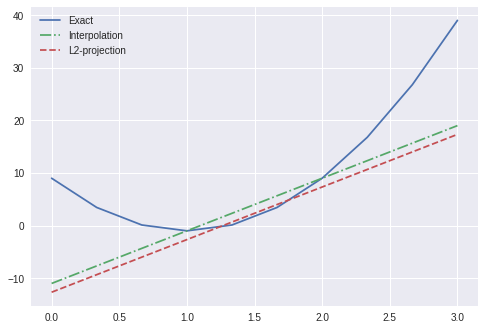

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


a, b = 1, 2

x = sp.Symbol('x')
f = 10*(x-1)**2-1
psi=[1, x]
points = [a, b]



Pf = projection(f, psi, Omega=[a, b])
If = interpolation(f, psi, points)

lam_f = sp.lambdify(x, f, modules=['numpy'])
lam_If = sp.lambdify(x, If, modules=['numpy'])
lam_Pf = sp.lambdify(x, Pf, modules=['numpy'])


x_vals = np.linspace(0, 3, 10)
f_vals = lam_f(x_vals)
If_vals = lam_If(x_vals)
Pf_vals = lam_Pf(x_vals)

plt.figure(1)
plt.plot(x_vals, f_vals,'-',x_vals, If_vals,'-.', x_vals, Pf_vals,'--')
plt.gca().legend(('Exact','Interpolation','L2-projection'))
